### 过拟合
神经网络有着非常惊艳的拟合能力，上面我们已经看到了神经网络可以逼近函数和概率分布，实现多种有趣的任务。但是和上面的玩具数据集做出来的结果不同，神经网络在实际问题里非常有可能出现更为严重的过拟合。而除了上面的正则化方法以外，我们还有其他方法控制过拟合。  
**Eealy Stop**  
一种相当直觉的方法，但是经常能够凑效。我们在训练时用一个验证集辅助训练，一旦训练出现了让测试集loss下降的趋势就立刻停止训练。  
**DropOut**  
从模型融合中得到启发，做过Kaggle的人应该有经验，在模型和算法已经完善的末期，我们进一步提升正确率的方法就是在模型中引入随机因素，制造很多的模型形成委员会，用这个混合的模型进行任务决策。而神经网络自己本就是一个混合模型，如果我们使用dropout的技巧，即每次训练时，随机临时删除一些 神经元，它们将不在这次运算中发挥作用，同样也不会被更新。这样，一个神经网络就相当于多个小型神经网络的混合模型，这个方法在大型任务重常常很实用。  
**更好的数据集**  
更多更好的数据是防止过拟合的最好方法，即使没有更多的数据，我们也可以用一些技巧创造数据。这个做法在图像和语音领域尤其适用，我们可以随机对图片进行旋转，平移，加噪声，来获得更多更稳定的数据集。  
**reinforcement**
强化学习是一种特殊的方法，它基于模型的对抗进行。在对弈和决策问题里，我们可以通过模型对抗的方式让模型自行学习，从而获得超越数据集的成效。最好的例子就是击败人类的alphago。
### Dropout
网络过于习惯训练集的数据分布, 尤其是如果训练集规模还不够大时, 网络会出现严重的过拟合, 使得在训练集上的准确率非常高, 但是测试集上的准确率很低. 而且这个过程还不可逆, 一旦网络过拟合那网络就废了, 我们的努力全部木大.  
神经网络中的一种有效的对抗过拟合的方法是dropout, 它基于模型融合的思想, 让当前隐层的一些神经元暂时死掉, 它的输出将是0 ,从而不对本次前向和反向传播产生任何影响. 这样做的好处是, 如果这样的模型仍然能被训练到收敛, 那么我们可以认为我们从隐层中抽取出一定比例的神经元也仍然是收敛的. 然而这样随机采样得到的很多小一些的子网络与子网络之间是有些微的差异的, 这些差异经过模型融合, 能让总网络变成一个不具有倾向性的模型(委员会思想). 从而模型的偏差可能会上升一些, 但是方差一般会降低更多.  
![dropout.png](dropout.png)
它的前向和反向传播非常简单, 我们只需要给定一个概率, 然后它就会生成一个mask把一定比例的x置零再输出. 反向传播时, 因为mask处的x被置零了, 就相当于点乘了一个0常数, 那么它的反向传播也是乘一个0, mask把对应位置的dz置零再反向传播.  

### Batch-Normalization
接下来我们要讲一下, 能让训练加速的一种技巧, 叫做batch norm. 相对于卷积和循环的网络, 这种技术的出现是2015年, 是很年轻的技术. 这种方法针对训练中(尤其是在深度网络里)遇到的困难提出一些解决方案, 之前我们的代码实践虽然是深度学习, 但并不算是非常deep的网络, 真正很深的大型网络在训练时会面临Internal Covariate Shift的问题. 简单来说, 我们的反向传播计算梯度是逐层进行的, 当我们更新了第l层的参数, 第l层的输出也会改变, 从概率的角度解释就是分布发生了改变. 这样l+1层就需要去适应新的输入分布, 这个过程需要时间. 可怕的是, 当网络很深时, 这个适应过程就会非常复杂且困难, 为了加速深度网络的训练, 有一种想法是, 我们人为地改变数据分布, 每一隐层无论何时, 分布都是相似的. 一种方法就是规范化方法, 我们把数据分布减去分布的均值再除以标准差, 这样分布就会被规约到和标准正态分布类似. 注意这里的规范化是对每一维度独立进行的, 而不是计算样本集的协方差矩阵, 那样会浪费大量算力.  
$$ \mu_j =  \frac{1}{m}\sum_{i=1}^m Z_{ji} $$
$$ \sigma_j^2 =  \frac{1}{m}\sum_{i=1}^m (Z_{ji}-\mu_j)^2 $$
$$ \hat Z_{ji} = \frac{Z_{ji}-\mu_j}{\sigma_j} $$
这个做法当然是可以的, 我们在数据科学中使用的一种数据预处理方式就是这种Normalization. 在神经网络中当然也可以用, 而且很适合, 因为大多数我们用到的激活函数都是在输入x=0时斜率最大, 从而梯度最大, 学习速度最快. 如果我们把这种方法应用在隐层间, 就能解决上面Internal Covariate Shift的问题.  
但是如果真的那么做, 会出现新的问题. 我们知道神经网络的一大特点就是越深层, 特征就越抽象. 最明显的例子是自编码器, 如果我们用自编码器处理MNIST数据, 并把隐层的特征在2D平面做可视化, 会看见不同类别的数据会被编码到独立的区域. 这就是深度的网络对数据处理后的结果. 但是这时我们用一个这样的norm处理它, 很大可能会把网络已经提取到的不同的特征再次混合在一起, 网络的表达能力遭到伤害. 那么要怎样既能保住底层网络学习到的参数信息, 又能修正数据分布, 方便网络训练呢?  
BN的最大贡献就是这部分, 我们再次加入两个参数, 把数据分布再做一个一维线性变换, 把分布拉离0, 并修正方差. 也就是
$$ y_{ji} = \gamma_j\hat Z_{ji} + \beta_j $$
相当于和上面的规范化相对的一种方法, 如果mu和beta相等, gamma和sigma相等, 这就是一个没有进行变换的变换. 通过上面的步骤，我们就在一定程度上保证了输入数据的表达能力.  有时我们会为了处理分母, 用一个eps来辅助运算, 总的运算方法如下.
![batchnorm.png](batchnorm.png)
### BN的BP
这个过程的反向传播是怎么做的呢? 其实再怎么复杂也无非是代数求导, 只要有耐心推就怎么都推得出来. 
$$ \frac{\partial L}{\partial \beta_j} = SUMROW \frac{\partial L}{\partial y_{ij}} $$
$$ \frac{\partial L}{\partial \gamma_j} = SUMROW \frac{\partial L}{\partial y_{ij}}*Z_{ij} $$
$$ \frac{\partial L}{\partial Z_{ij}} = \gamma_j \frac{\partial L}{\partial y_{ij}}\frac{\partial\hat Z_{ij}}{\partial Z_{ij}} $$
下面的部分才比较复杂, 均值的偏导比较容易, 但是方差不但有分数形式还与均值有关, 我们分三步来看向量形式的求导
![bn_bp0.PNG](bn_bp0.PNG)
这里抄一张图, batchnorm的计算图展开, 可视化的计算可能会更为清晰
![bn_bp.png](bn_bp.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
path = os.getcwd()
os.chdir('..')
from deepnotes import *
os.chdir(path)
# 验算梯度用
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
bn_torch = torch.nn.BatchNorm1d(2)
bn_torch.eps = 0
bn_torch.momentum = 0
bn_torch.train()

x = torch.randn(5,2)
target = torch.randn(5,2)
x.requires_grad = True
y = bn_torch(x)

loss = F.mse_loss(y,target,reduction='sum')
bn_torch.zero_grad()
if x.grad:
    x.grad.data.zero_()
loss.backward()

print("output:\n",y)
print("weight grad:\n",bn_torch.weight.grad)
print("bias grad:\n",bn_torch.bias.grad)
print("x grad:\n",x.grad)

output:
 tensor([[ 0.0965, -0.0521],
        [ 1.1832,  0.1047],
        [-1.8249, -0.1628],
        [ 0.0361,  1.6289],
        [ 0.5091, -1.5187]], grad_fn=<NativeBatchNormBackward>)
weight grad:
 tensor([10.3113,  6.8323])
bias grad:
 tensor([ 0.9334, -5.1370])
x grad:
 tensor([[ 4.2760,  4.0436],
        [-0.1107,  0.3687],
        [-0.1849, -1.5179],
        [-2.9751, -1.4204],
        [-1.0053, -1.4741]])


In [3]:
bn = BatchNorm(2)
bn.weight = bn_torch.weight.data.numpy()
bn.bias = bn_torch.bias.data.numpy()
y = bn(x.data.numpy())
dx = bn.backward((y-target.data.numpy())*2)

print("output:\n",y)
print("weight grad:\n",bn._dw)
print("bias grad:\n",bn._db)
print("x grad:\n",dx)

output:
 [[ 0.09650204 -0.05210881]
 [ 1.1832237   0.10468968]
 [-1.8248808  -0.16284497]
 [ 0.03606102  1.6289374 ]
 [ 0.5090945  -1.5186734 ]]
weight grad:
 [10.31134701  6.83230639]
bias grad:
 [ 0.93340707 -5.13704538]
x grad:
 [[ 4.2759824   4.043637  ]
 [-0.11070609  0.36869228]
 [-0.18490124 -1.5178801 ]
 [-2.975091   -1.4203757 ]
 [-1.0052843  -1.4740726 ]]


### 工程细节
在实际使用batch norm时, 深度学习框架通常会把模块定义成两个模式, 一个是训练模式一个是测试模式. 在训练时, 我们的BN层会不断吃数据, 并计算出一个对整个训练集而言的均值和方差, 在测试时, 我们会用这个均值和方差进行计算. 从而让训练时的局部性不会对测试产生影响. 具体到实现上就是train模式和eval模式.  
再者就是上面提到的epsilon避免方差过小. 更新batch norm的方法是梯度下降, 我们计算出w和b的梯度后会用梯度优化方法优化参数, 这时pytorch还设置了动量, 避免w和b产生过大的更新. 从实践经验上来看, 这一点的帮助还是相当大的.  
这里为了不大改框架，就只实现一个训练模式。事实上，训练模式完全可以用在测试模式里，只不过效果可能略逊一筹。

In [4]:
import tensorflow as tf
# load mnist dataset
(x_train_origin,t_train_origin),(x_test_origin,t_test_origin) = tf.keras.datasets.mnist.load_data()

X_train,X_test = x_train_origin/255.,x_test_origin/255.
batch_size = 100

train_loader = DataLoader(X_train,t_train_origin,batch_size)
test_loader = DataLoader(X_test,t_test_origin,batch_size)

C:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch [1/5], Step [100/600], Loss: 0.5630
Epoch [1/5], Step [200/600], Loss: 0.2306
Epoch [1/5], Step [300/600], Loss: 0.1722
Epoch [1/5], Step [400/600], Loss: 0.1585
Epoch [1/5], Step [500/600], Loss: 0.1521
Epoch [1/5], Step [600/600], Loss: 0.1143
Epoch [2/5], Step [100/600], Loss: 0.0966
Epoch [2/5], Step [200/600], Loss: 0.0759
Epoch [2/5], Step [300/600], Loss: 0.0692
Epoch [2/5], Step [400/600], Loss: 0.0630
Epoch [2/5], Step [500/600], Loss: 0.0641
Epoch [2/5], Step [600/600], Loss: 0.0501
Epoch [3/5], Step [100/600], Loss: 0.0460
Epoch [3/5], Step [200/600], Loss: 0.0348
Epoch [3/5], Step [300/600], Loss: 0.0291
Epoch [3/5], Step [400/600], Loss: 0.0328
Epoch [3/5], Step [500/600], Loss: 0.0299
Epoch [3/5], Step [600/600], Loss: 0.0239
Epoch [4/5], Step [100/600], Loss: 0.0247
Epoch [4/5], Step [200/600], Loss: 0.0184
Epoch [4/5], Step [300/600], Loss: 0.0198
Epoch [4/5], Step [400/600], Loss: 0.0217
Epoch [4/5], Step [500/600], Loss: 0.0260
Epoch [4/5], Step [600/600], Loss:

Text(0.5,1,'Train loss(Cross Entropy)')

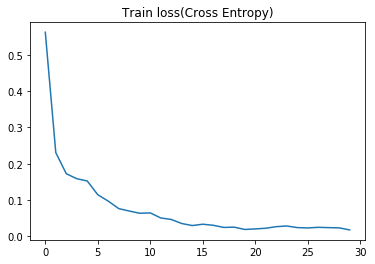

In [5]:
num_epochs = 5
total_step = len(train_loader)

model = Sequential(
    Linear(28*28,512),
    BatchNorm(512),
    ReLU(),
    Linear(512,256),
    BatchNorm(256),
    ReLU(),
    Linear(256,128),
    BatchNorm(128),
    ReLU(),
    Linear(128,64),
    BatchNorm(64),
    ReLU(),
    Linear(64,10)
)

loss_func = CrossEntropyLossWithSoftMax(10)
optimizer = Adam(0.001)
model.apply_optim(optimizer)

loss_list = []
log_step = 100 

for epoch in range(num_epochs):
    running_loss = 0.
    for i in range(total_step):
        x,y = train_loader.get_batch()
        x = x.reshape(x.shape[0],-1)
        # Forward pass
        logits = model(x)
        # calculate loss
        loss,dlogits = loss_func(logits,y)
        # Backward
        model.zero_grad()
        model.backward(dlogits)
        # optimize
        optimizer.step()
        
        running_loss += loss.item()
        
        if (i+1) % log_step == 0:
            running_loss/=log_step
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, running_loss))
            loss_list.append(running_loss)
            running_loss = 0.

plt.plot(loss_list)
plt.title('Train loss(Cross Entropy)')

In [6]:
correct = 0
total = 0

for i in range(len(test_loader)):
    x,y = test_loader.get_batch()
    x = x.reshape(x.shape[0],-1)
    # Forward pass
    outputs = model(x)
    predicted = np.argmax(outputs, axis = 1)
    total += y.shape[0]
    correct += (predicted == y).sum()
    
print('Accuracy of the network on the 10000 test images: %.2f %%'%(100 * correct / total))

Accuracy of the network on the 10000 test images: 96.98 %
